In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X,
                                                          y,
                                                          train_size=0.70,
                                                          random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                                      y_trainval,
                                                      train_size=0.70,
                                                      random_state=0)

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
from sklearn.metrics import mean_absolute_error

y_pred_train = linear_regression.predict(X_train)
mse_train = mean_absolute_error(y_train, y_pred_train)

print(f'MAE train {mse_train:.3f}')

MAE train 3.294


In [8]:
y_pred_valid = linear_regression.predict(X_valid)
mse_valid = mean_absolute_error(y_valid, y_pred_valid)

print(f'MAE valid {mse_valid:.3f}')

MAE valid 3.161


In [7]:
y_pred_test = linear_regression.predict(X_test)
mse_test = mean_absolute_error(y_test, y_pred_test)

print(f'MSE test {mse_test:.3f}')

MSE test 3.662


## coef

In [8]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['target'] = y

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [9]:
df.shape

(506, 14)

In [10]:
for x, y in zip(boston.feature_names, linear_regression.coef_):
    print(f'{x.rjust(7)}: {y:.3f}')

   CRIM: -0.124
     ZN: 0.054
  INDUS: -0.083
   CHAS: 3.527
    NOX: -15.889
     RM: 2.675
    AGE: 0.004
    DIS: -1.613
    RAD: 0.326
    TAX: -0.014
PTRATIO: -0.930
      B: 0.002
  LSTAT: -0.564


# hoge

In [34]:
from sklearn.linear_model import LinearRegression
df = pd.DataFrame(X, columns=boston.feature_names)

cols = [
    'CRIM',  # -0.124
    # 'ZN',  # 0.054
    # 'INDUS',  # -0.083
    'CHAS',  # 3.527
    'NOX',  # -15.889
    'RM',  # 2.675
    # 'AGE',  # 0.004
    # 'DIS',  # -1.613
    'RAD',  # 0.326
    # 'TAX',  # -0.014
    'PTRATIO',  # -0.930
    # 'B',  # 0.002
    'LSTAT',  # -0.564
]

X_trainval, X_test, y_trainval, y_test = train_test_split(df[cols],
                                                          boston.target,
                                                          train_size=0.70,
                                                          random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                                      y_trainval,
                                                      train_size=0.70,
                                                      random_state=0)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

print(linear_regression.score(X_train, y_train))
print(linear_regression.score(X_valid, y_valid))
print(linear_regression.score(X_test, y_test))

0.6971859935846243
0.7713244732059865
0.6174806790280921


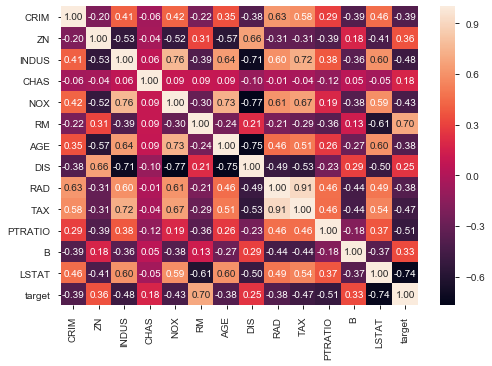

In [35]:
hoge = df.copy()
hoge['target'] = boston.target
sns.heatmap(hoge.corr(),
            annot=True,
            fmt='.2f')

In [29]:
import pandas_profiling
pandas_profiling.ProfileReport(df[cols])